<IPython.core.display.Javascript object>


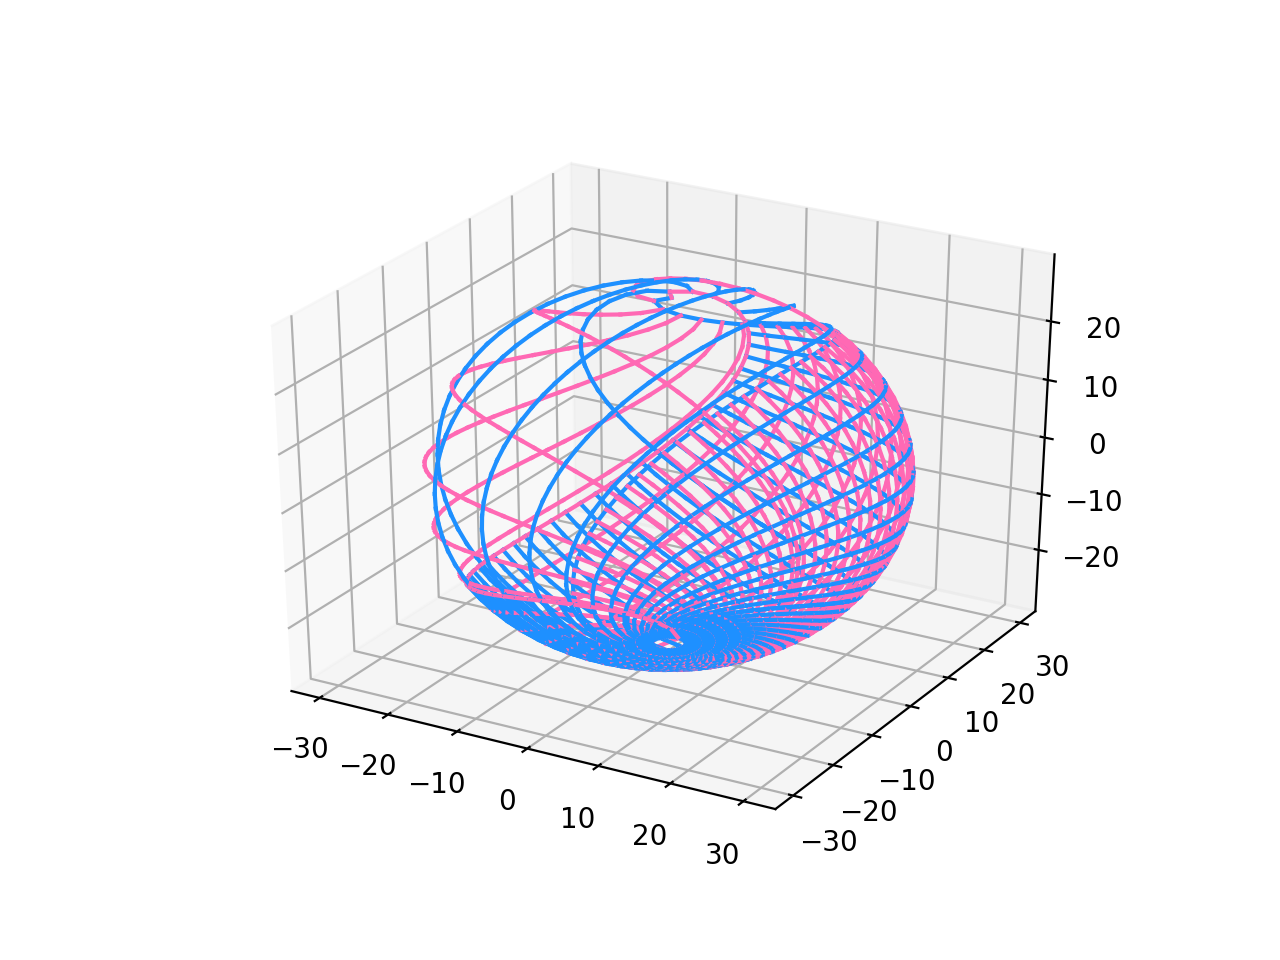

In [2]:
from math import pi
import numpy as np
import xarray as xr
# %matplotlib inline
%matplotlib notebook
import math 
import matplotlib.pyplot as plt
from numpy import linalg as LA
from mpl_toolkits.mplot3d import axes3d, Axes3D

r, r1, r2 = 30, 0.4, 2.4 #Radius of sphere, torque 1 and torque 2
step = 2.4               #Step in absolute value
alpha = 2*pi             #Radial distribution of starting points on Torque 1

# Loads
m = np.array([
        [0,0,0],
        [0,0,1],
        [0,1,0]
    ])                                          #strain tensor
# 3-Generation of the Form
c1 = np.array([np.sqrt(r**2-r1**2), 0, 0])      #Position of Torque 1 center
c2 = np.array([np.sqrt(r**2-r2**2), 0, pi])     #Position of Torque 2 center
#Starting points definition on Torque 1
starting_points = [] #  n x 3
long = 2*pi/alpha
for i in 1 + np.arange(long):
    a = 2 * pi * i / long
    node = np.array([r,a,math.acos(c1[0]/r)])
    starting_points.append(node)
starting_points = np.array(starting_points)
#Calculate eigenvectors and eigenvalues
d, v = LA.eig(m)
v = v[:, d != 0]
d = d[d != 0]
lambda_M = d[0]
lambda_m = d[-1]
pi_M = v[:, 0] * np.sign(v[-1, 0])
pi_m = v[:, -1] * np.sign(v[-1, -1])

def sph2cart(azimuth,elevation,r):
    x = r * np.cos(elevation) * np.cos(azimuth)
    y = r * np.cos(elevation) * np.sin(azimuth)
    z = r * np.sin(elevation)
    return x, y, z

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
next_starting_points = []

while max(np.array(starting_points)[:,2]) < (pi-math.acos(c2[0]/r)):
    total_len = len(starting_points) 
    for time, (r, a, angle) in enumerate(starting_points):
        x, y, z = sph2cart(a, pi/2 - angle, r)
        use_both = time == 0 or time == total_len - 1
        use_M = use_both or time >= total_len // 2
        use_m = use_both or time < total_len // 2
        for pi_select, color, use in (pi_M, 'dodgerblue', use_M), (pi_m, 'hotpink', use_m):
            if not use:
                continue
            (pi_r, pi_a, pi_angle) = pi_select
            mr, ma, mangle = m_sphere = [r + step * pi_r, 
                             a + step * pi_a/(r * math.sin(angle)), 
                             angle + step * pi_angle/r]
            next_starting_points.append(m_sphere)
            mx, my, mz = sph2cart(ma, pi/2 - mangle, mr)
            ax.plot(
             [x, mx],
             [y, my],
             zs = [z, mz], 
             color = color) 
    
    starting_points = next_starting_points
    next_starting_points = []
plt.show()

In [1]:
pi_M

NameError: name 'pi_M' is not defined